In [4]:
#Singular Value Decomposition (SVD)
# Step 1: Import required libraries
import numpy as np	
import matplotlib.pyplot as plt

Shape of u_data: (500, 64, 64)
Shape of v_data: (500, 64, 64)


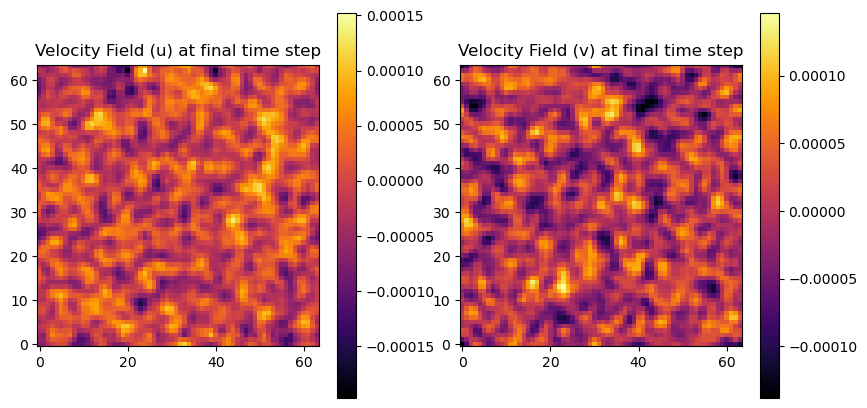

In [5]:
# Step 2: Load KolSol-generated data (velocity fields)
u_data = np.load('u_data.npy')  # X-velocity component
v_data = np.load('v_data.npy')  # Y-velocity component

# Print the shape of the loaded data
print(f"Shape of u_data: {u_data.shape}")
print(f"Shape of v_data: {v_data.shape}")

# Visualize the velocity field at the final time step
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Velocity Field (u) at final time step")
plt.imshow(u_data[-1], origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Velocity Field (v) at final time step")
plt.imshow(v_data[-1], origin='lower', cmap='inferno')
plt.colorbar()

plt.show()

In [7]:
# Step 3: Reshape the data for SVD
# I will apply SVD to the reshaped velocity fields. Flatten each velocity field for u and v.
# Combining the data from u and v components to form a single matrix for SVD.

# Reshape each time step's velocity field into a 1D vector and stack them
u_data_reshaped = u_data.reshape(u_data.shape[0], -1)
v_data_reshaped = v_data.reshape(v_data.shape[0], -1)

# Combine u and v data into one matrix
data_matrix = np.hstack([u_data_reshaped, v_data_reshaped])
print(f"Shape of data matrix for SVD: {data_matrix.shape}")

Shape of data matrix for SVD: (500, 8192)


In [10]:
# Step 4: Apply SVD
U, Sigma, VT = np.linalg.svd(data_matrix, full_matrices=False)

# Print the shapes of the SVD components
print(f"Shape of U: {U.shape}")
print(f"Shape of Sigma: {Sigma.shape}")
print(f"Shape of VT: {VT.shape}")

Shape of U: (500, 500)
Shape of Sigma: (500,)
Shape of VT: (500, 8192)


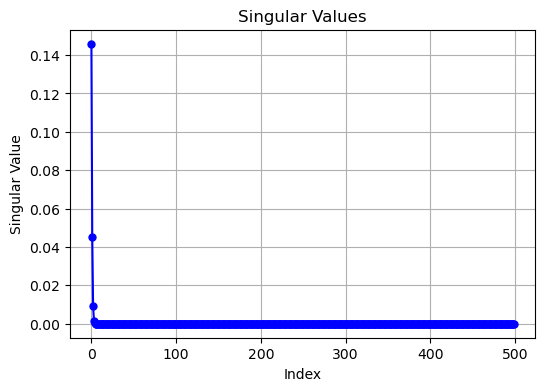

In [11]:
# Step 5: Plot the singular values
plt.figure(figsize=(6, 4))
plt.plot(Sigma, 'bo-', markersize=5)
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.grid()
plt.show()

In [14]:
# Dimensionality Reduction using SVD
# Step 6: Choose the number of singular values to retain (dimensionality reduction)
num_singular_values = 10  # You can adjust this value depending on how much compression is needed

# Reconstruct the data using the first 'num_singular_values' singular values
U_reduced = U[:, :num_singular_values]
Sigma_reduced = np.diag(Sigma[:num_singular_values])
VT_reduced = VT[:num_singular_values, :]

# Reconstruct the approximate data
data_matrix_reconstructed = np.dot(np.dot(U_reduced, Sigma_reduced), VT_reduced)

# Separate the reconstructed u and v data
u_data_reconstructed = data_matrix_reconstructed[:, :u_data_reshaped.shape[1]].reshape(u_data.shape)
v_data_reconstructed = data_matrix_reconstructed[:, u_data_reshaped.shape[1]:].reshape(v_data.shape)

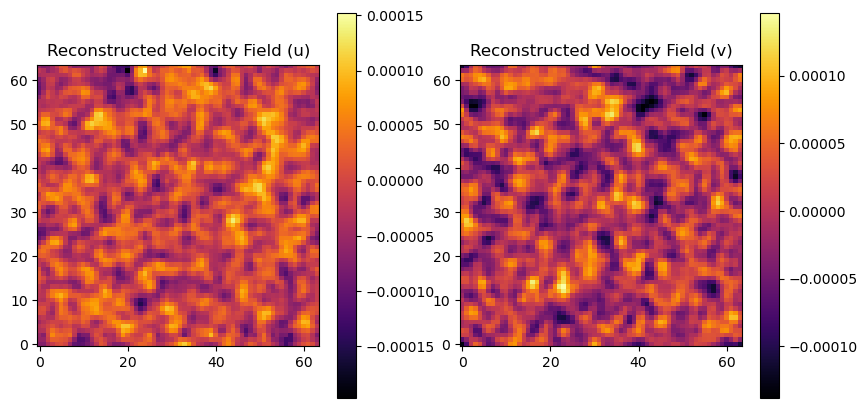

In [16]:
# Step 7: Visualize the reconstructed velocity field
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Reconstructed Velocity Field (u)")
plt.imshow(u_data_reconstructed[-1], origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Reconstructed Velocity Field (v)")
plt.imshow(v_data_reconstructed[-1], origin='lower', cmap='inferno')
plt.colorbar()

plt.show()